In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# AIRTRAFFIC

In [2]:
https://www.selectusa.gov/travel-tourism-and-hospitality-industry-united-states#:~:text=The%20U.S.%20travel%20and%20tourism,of%20all%20U.S.%20services%20exports.

SyntaxError: invalid syntax (<ipython-input-2-d513f4c5d110>, line 1)

In [3]:
def transform_bts_data(df):
    df["Scheduled"] = pd.to_numeric(df["Scheduled"])
    df["Period"] = pd.to_datetime(systems_traffic_usa["Period"])
    return df

In [8]:
# US BTS Systems Passenger Enplamenents Jan 2000-Jan 2020
systems_traffic_usa = pd.read_csv('data/USCarrier_Traffic_20200608173856.csv', skiprows=[0,1,2])
systems_traffic_usa = systems_traffic_usa.drop(len(systems_traffic_usa) - 1)
systems_traffic_usa = transform_bts_data(systems_traffic_usa)
systems_traffic_usa.iloc[20]

Period       2001-09-01 00:00:00
Scheduled                  34608
Name: 20, dtype: object

In [71]:
years = systems_traffic_usa.groupby(systems_traffic_usa['Period'].map(lambda x: x.year)).sum().reset_index()
#years.Period = pd.to_datetime({"year": years["Period"], "day": 1, "month": 1})
years.Period = list(range(2000, 2021, 1))
years = years.drop(20)
years.head()

,Period,Scheduled
0,2000,669282
1,2001,625065
2,2002,616176
3,2003,647468
4,2004,703691


In [143]:
qbq = pd.DataFrame(index=["Jan-Mar", "Apr-Jun", "Jul-Sept", "Sept-Dec"], data=[q1, q2, q3, q4]).reset_index()
qbq
qbq.to_json('data/quarterly.json', orient='values')

,index,0
0,Jan-Mar,210804
1,Apr-Jun,241614
2,Jul-Sept,243330
3,Sept-Dec,230988


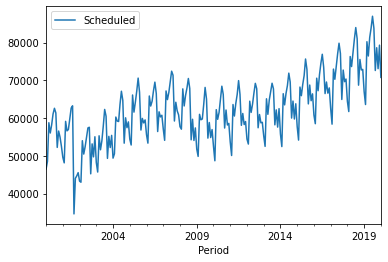

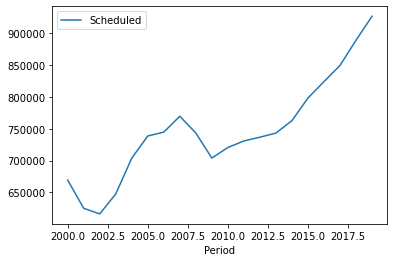

In [72]:
systems_traffic_usa.plot(kind='line', x="Period", y="Scheduled")
years.plot(kind='line', x="Period", y="Scheduled")

In [146]:
diffs = pd.DataFrame().assign(**{"Year": list(range(2000, 2021, 1)), "Diff": years.Scheduled.pct_change() * 100})
diffs = np.round(diffs.drop([0, 20]).reset_index().drop('index', axis=1), 3)
diffs.head()

,Year,Diff
0,2001,-6.607
1,2002,-1.422
2,2003,5.078
3,2004,8.684
4,2005,4.965


In [97]:
diffs.to_json('data/diffs_systems.json', orient='values')

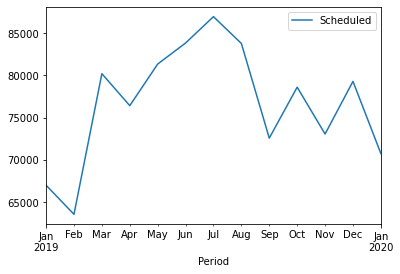

In [147]:
systems_traffic_usa.iloc[228:253].plot(kind='line', x="Period", y="Scheduled")

 # PASSPORT

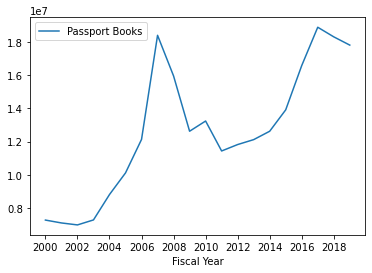

In [204]:
# US STATE DEPT PASSPORT ISSUANCE
passports_raw = pd.read_csv('data/us_passports_issued.csv')
passports_raw.head()
passport_cards = passports_raw["U.S. Passports Issued"].str.split().iloc[:12].apply(lambda x: int(x[2].replace(',','')))
passport_cards.head()
passport_total = passports_raw["U.S. Passports Issued"].str.split().apply(lambda x: int(x[0].replace(',','')))
passport_total.head()
passport_books = passport_total.sub(passport_cards, fill_value=0)
passport_books.head()
passport = pd.DataFrame().assign(**{
    "Fiscal Year": passports_raw["Fiscal Year"].astype('int'),
    "Passport Books": passport_books.astype('int'),
    "Passport Cards": passport_cards.astype('int'),
    "Passport Totals": passport_total.astype('int')
})
passport.head()
passport.plot(x="Fiscal Year", y="Passport Books", xticks=passports_raw["Fiscal Year"].astype('int').sort_values().tolist()[::2])

# QBQ

In [181]:
regs = pd.read_csv('data/us_citizens_by_region.csv')
regs = regs.drop([10, 16])
regs

,Regions,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,YTD (1),Share
0,Europe,"748,793","687,296","1,244,957","1,265,129","1,863,752","2,416,683","2,119,468","1,851,968","1,854,896","1,424,376","1,060,561","1,204,379","17,742,258",12.30%,19.10%
1,Caribbean,"598,896","673,271","889,631","722,504","725,539","900,872","951,631","746,542","451,939","537,150","654,185","850,057","8,702,217",4.60%,9.40%
2,Asia,"490,348","422,237","589,421","529,962","514,853","582,670","548,732","445,041","444,563","556,296","557,694","571,086","6,252,903",8.40%,6.70%
3,South America,"142,741","153,627","191,110","145,104","165,023","206,951","190,062","179,596","139,333","152,095","179,185","259,280","2,104,107",9.30%,2.30%
4,Central America,"253,091","276,689","359,897","243,640","243,452","341,323","329,889","243,051","156,574","181,356","246,984","360,787","3,236,733",6.80%,3.50%
5,Oceania,"73,516","90,014","87,278","56,432","55,706","66,414","64,742","52,570","53,774","65,396","86,389","108,323","860,554",10.80%,0.90%
6,Middle East,"200,003","181,962","222,711","174,918","198,933","251,942","244,088","208,352","164,429","183,827","185,829","226,297","2,443,291",5.90%,2.60%
7,Africa,"26,621","23,962","35,512","29,709","34,189","48,286","50,310","43,275","32,450","31,875","31,548","44,008","431,745",7.10%,0.50%
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Total Overseas (2),"2,534,009","2,509,058","3,620,517","3,167,398","3,801,447","4,815,141","4,498,922","3,770,395","3,297,958","3,132,371","3,002,375","3,624,217","41,773,808",9.00%,44.90%


In [255]:
twenty_eighteen = pd.DataFrame(regs.drop(['Regions', 'Annual', 'YTD (1)', 'Share'], axis=1).iloc[15])
twenty_eighteen.reset_index()

,index,17
0,Jan,"6,057,128"
1,Feb,"6,007,548"
2,Mar,"7,983,318"
3,Apr,"6,885,644"
4,May,"7,915,303"
5,Jun,"9,756,362"
6,Jul,"9,959,378"
7,Aug,"9,011,316"
8,Sep,"7,304,529"
9,Oct,"6,948,874"


In [266]:
twenty_eighteen[17].str.replace(',','').astype(int).values

array([6057128, 6007548, 7983318, 6885644, 7915303, 9756362, 9959378,
       9011316, 7304529, 6948874, 6861084, 8347774])

In [275]:
twenty_eighteen_clean = pd.DataFrame(data=[twenty_eighteen[17].str.replace(',','').astype(int).values], columns=twenty_eighteen.index).T
twenty_eighteen_clean = twenty_eighteen_clean.reset_index()
twenty_eighteen_clean[0] = np.round((twenty_eighteen_clean[0] / twenty_eighteen_clean[0].sum()) * 100, 2)
twenty_eighteen_clean

,index,0
0,Jan,6.51
1,Feb,6.46
2,Mar,8.58
3,Apr,7.40
4,May,8.51
5,Jun,10.49
6,Jul,10.70
7,Aug,9.69
8,Sep,7.85
9,Oct,7.47


In [276]:
twenty_eighteen_clean.to_json('data/twenty_eighteen.json', orient='values')

In [200]:
q1 = twenty_eighteen[17].str.replace(',','').astype(int).iloc[:3].sum()
q2 = twenty_eighteen[17].str.replace(',','').astype(int).iloc[3:6].sum()
q3 = twenty_eighteen[17].str.replace(',','').astype(int).iloc[6:9].sum()
q4 = twenty_eighteen[17].str.replace(',','').astype(int).iloc[9:].sum()

In [202]:
qbq = pd.DataFrame(index=["Jan-Mar", "Apr-Jun", "Jul-Sept", "Sept-Dec"], data=[q1, q2, q3, q4]).reset_index()
qbq

,index,0
0,Jan-Mar,20047994
1,Apr-Jun,24557309
2,Jul-Sept,26275223
3,Sept-Dec,22157732


In [203]:
qbq.to_json('data/quarterly.json', orient='values')

# Continents

In [278]:
regs

,Regions,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,YTD (1),Share
0,Europe,"748,793","687,296","1,244,957","1,265,129","1,863,752","2,416,683","2,119,468","1,851,968","1,854,896","1,424,376","1,060,561","1,204,379","17,742,258",12.30%,19.10%
1,Caribbean,"598,896","673,271","889,631","722,504","725,539","900,872","951,631","746,542","451,939","537,150","654,185","850,057","8,702,217",4.60%,9.40%
2,Asia,"490,348","422,237","589,421","529,962","514,853","582,670","548,732","445,041","444,563","556,296","557,694","571,086","6,252,903",8.40%,6.70%
3,South America,"142,741","153,627","191,110","145,104","165,023","206,951","190,062","179,596","139,333","152,095","179,185","259,280","2,104,107",9.30%,2.30%
4,Central America,"253,091","276,689","359,897","243,640","243,452","341,323","329,889","243,051","156,574","181,356","246,984","360,787","3,236,733",6.80%,3.50%
5,Oceania,"73,516","90,014","87,278","56,432","55,706","66,414","64,742","52,570","53,774","65,396","86,389","108,323","860,554",10.80%,0.90%
6,Middle East,"200,003","181,962","222,711","174,918","198,933","251,942","244,088","208,352","164,429","183,827","185,829","226,297","2,443,291",5.90%,2.60%
7,Africa,"26,621","23,962","35,512","29,709","34,189","48,286","50,310","43,275","32,450","31,875","31,548","44,008","431,745",7.10%,0.50%
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Total Overseas (2),"2,534,009","2,509,058","3,620,517","3,167,398","3,801,447","4,815,141","4,498,922","3,770,395","3,297,958","3,132,371","3,002,375","3,624,217","41,773,808",9.00%,44.90%


In [294]:
continents_wo_na = regs[['Regions', 'Annual']].drop([1, 4 ,8 ,9, 11, 12, 13, 14,17, 18])
continents_wo_na.Annual = continents_wo_na.Annual.str.replace(",", "").astype(int)
continents_wo_na.Annual = np.round((continents_wo_na.Annual / continents_wo_na.Annual.sum()) * 100, 1)
continents_wo_na = continents_wo_na.sort_values(by='Annual', ascending=False)
continents_wo_na

,Regions,Annual
15,North America,63.2
0,Europe,21.9
2,Asia,7.7
6,Middle East,3.0
3,South America,2.6
5,Oceania,1.1
7,Africa,0.5


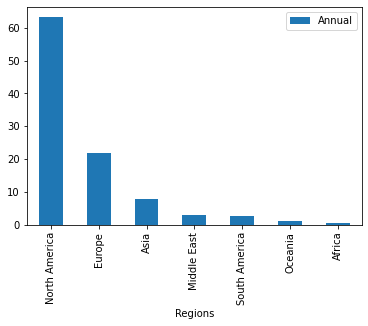

In [295]:
continents_wo_na.plot(x='Regions', y='Annual', kind='bar')

In [296]:
continents_wo_na.Annual = continents_wo_na.Annual.astype('str') + "%"
continents_wo_na

,Regions,Annual
15,North America,63.2%
0,Europe,21.9%
2,Asia,7.7%
6,Middle East,3.0%
3,South America,2.6%
5,Oceania,1.1%
7,Africa,0.5%


In [297]:
continents_wo_na.to_json('data/continents_wo_na.json', orient='values')

In [298]:
continents_na = regs[['Regions', 'Annual']].drop([0,2,3,5,6,7,8,9,12, 14,15,17,18])
continents_na.Annual = continents_na.Annual.str.replace(",", "").astype(int)
continents_na.Annual = np.round((continents_na.Annual / continents_na.Annual.sum()) * 100, 1)
continents_na = continents_na.sort_values(by='Annual', ascending=False)
continents_na.Annual = continents_na.Annual.astype('str') + "%"
continents_na

,Regions,Annual
11,Mexico (Total) (3)(P),58.4%
13,Canada (Total) (4),22.7%
1,Caribbean,13.8%
4,Central America,5.1%


In [299]:
continents_na.to_json('data/continents_na.json', orient='values')